In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score


from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


plt.rcParams['figure.figsize'] = (10,6)


In [2]:
data = pd.read_csv("student-por.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
data.describe().T.style.bar(subset=['mean'])\
                            .background_gradient(subset=['std'])\
                            .background_gradient(subset=['50%'])\
                            .background_gradient(subset=['max'])

,count,mean,std,min,25%,50%,75%,max
age,649.000000,16.744222,1.218138,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,649.000000,2.514638,1.134552,0.000000,2.000000,2.000000,4.000000,4.000000
Fedu,649.000000,2.306626,1.099931,0.000000,1.000000,2.000000,3.000000,4.000000
traveltime,649.000000,1.568567,0.748660,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,649.000000,1.930663,0.829510,1.000000,1.000000,2.000000,2.000000,4.000000
failures,649.000000,0.221880,0.593235,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,649.000000,3.930663,0.955717,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,649.000000,3.180277,1.051093,1.000000,3.000000,3.000000,4.000000,5.000000
goout,649.000000,3.184900,1.175766,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,649.000000,1.502311,0.924834,1.000000,1.000000,1.000000,2.000000,5.000000


In [6]:
data['G_Total'] = data.G1 + data.G2 + data.G3

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [8]:
data.Dalc = data.Dalc + data.Walc

In [9]:
data.Dalc.unique()

array([ 2,  5,  3,  4,  6, 10,  7,  8,  9], dtype=int64)

In [10]:
cat_col = [x for x in data.columns if data[x].dtypes == 'object']
num_col = [x for x in data.columns if x not in cat_col]

<AxesSubplot:xlabel='G_Total', ylabel='count'>

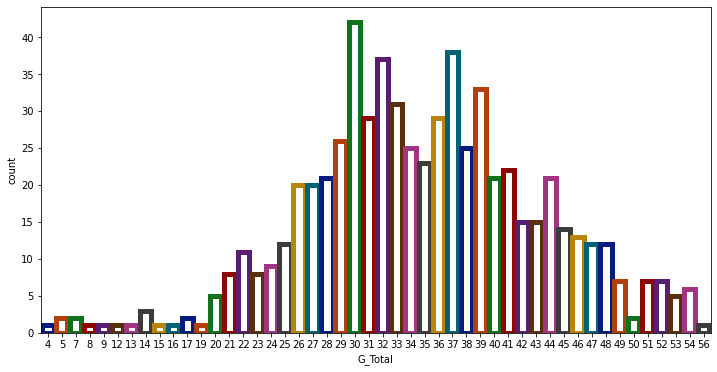

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='G_Total', data=data, facecolor=(0,0,0,0),linewidth=5,  edgecolor=sns.color_palette("dark", 10))

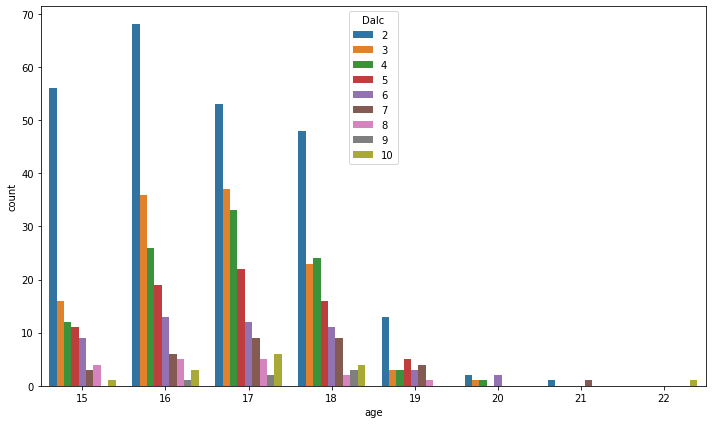

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='age',hue='Dalc')
plt.tight_layout()
plt.show()

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

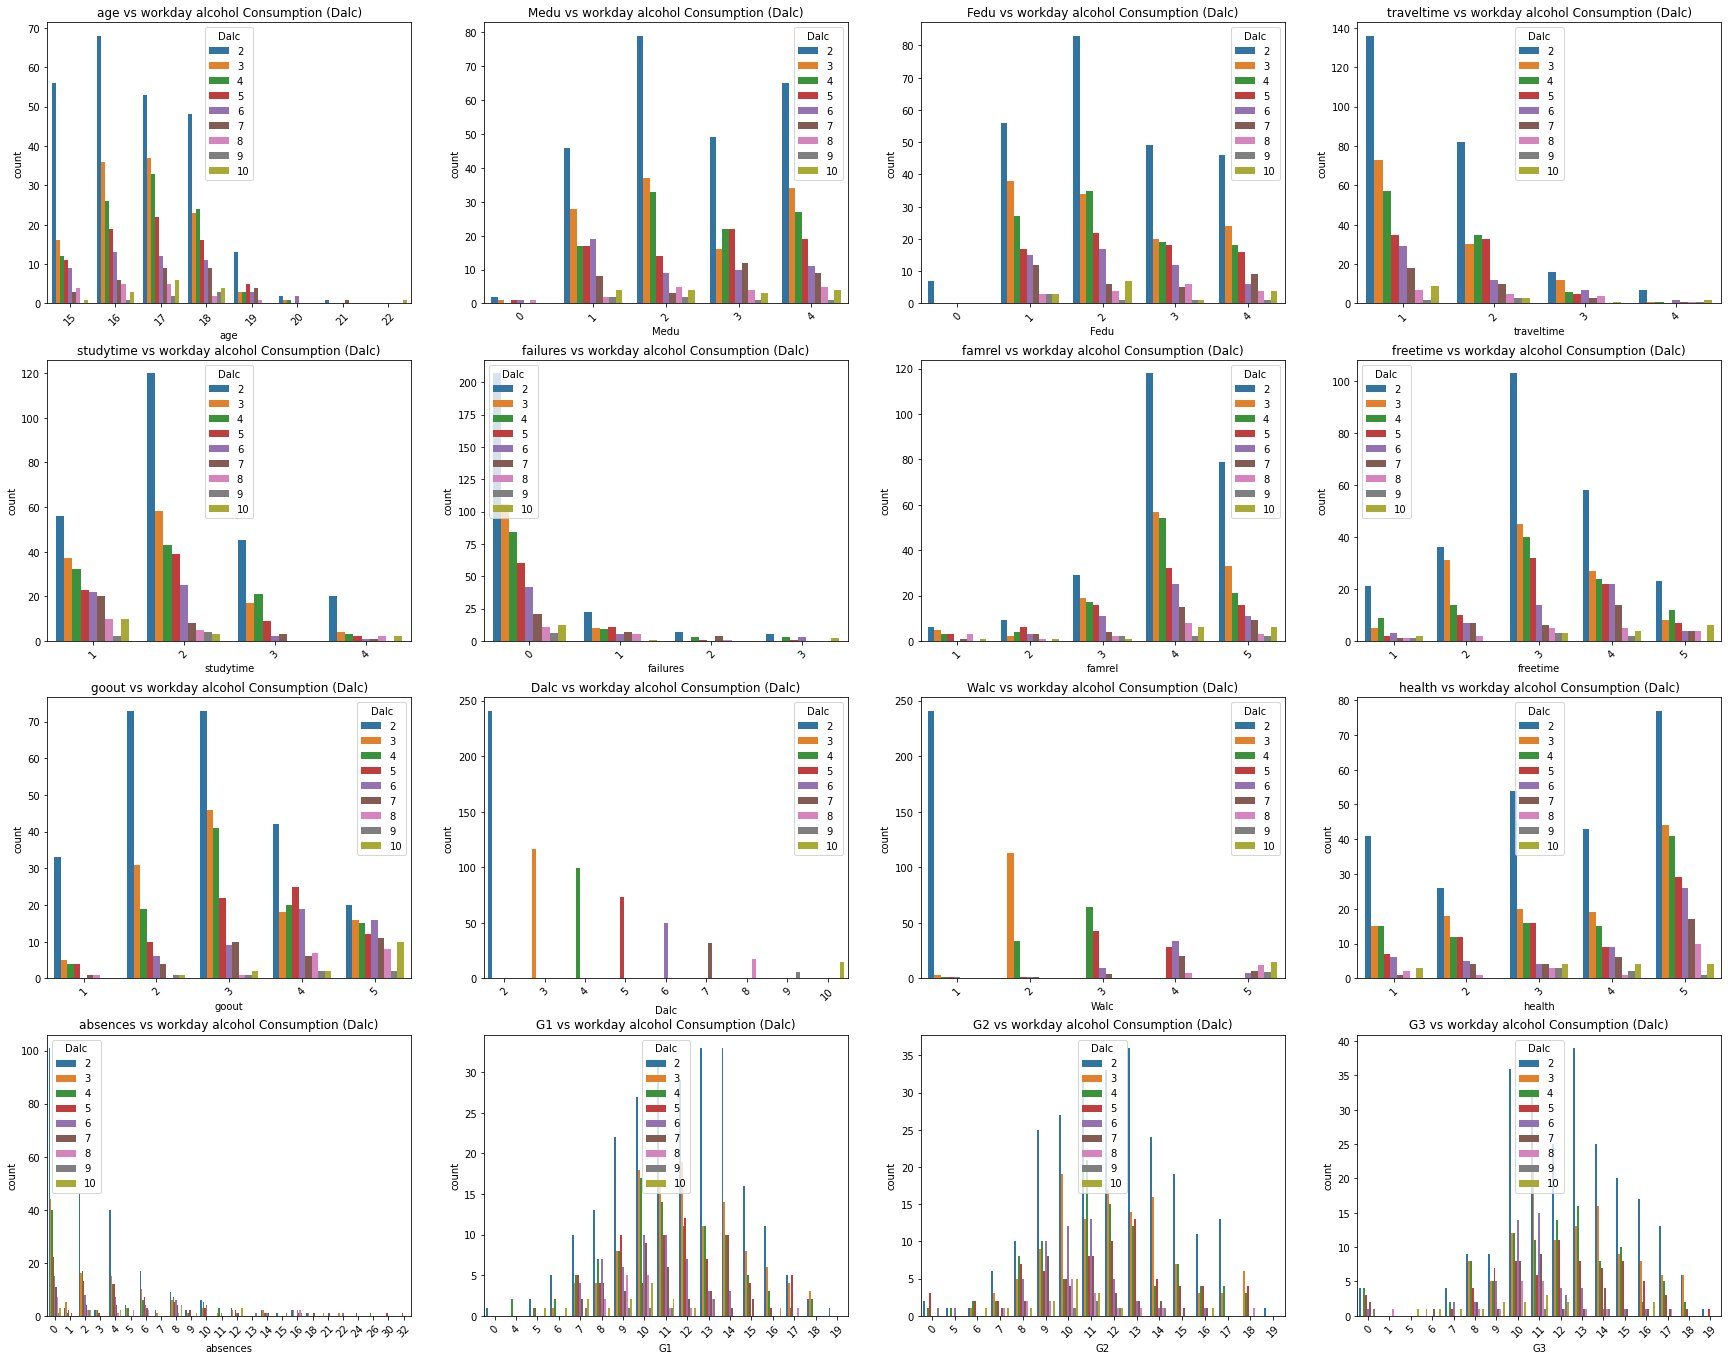

In [13]:
# lets examine various features together
plt.figure(figsize=(30,30))
feature = [x for x in num_col if 'G_Total' not in x]
for i in enumerate(feature):
    plt.subplot(5,4,i[0]+1)
    sns.countplot(i[1],hue='Dalc',data=data)
    plt.title(i[1]+' vs workday alcohol Consumption (Dalc)')
    plt.xticks(rotation=45)

<AxesSubplot:xlabel='school', ylabel='count'>

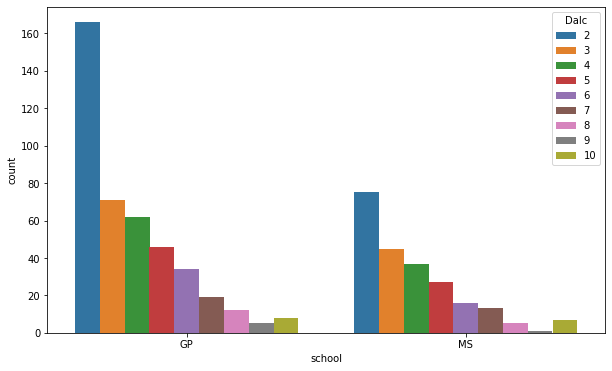

In [14]:
sns.countplot(data=data, x='school', hue='Dalc')

<AxesSubplot:xlabel='sex', ylabel='count'>

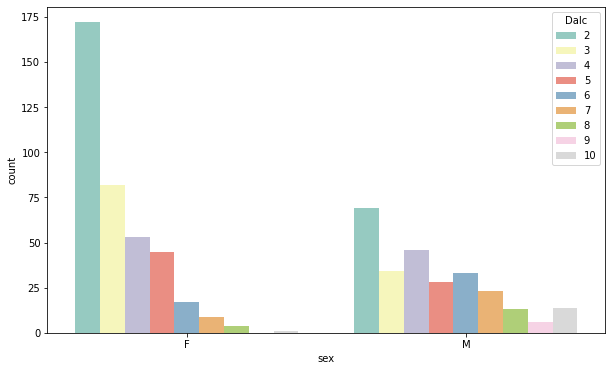

In [15]:
sns.countplot(data=data,x='sex',hue='Dalc', palette='Set3')

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dalc', ylabel='count'>

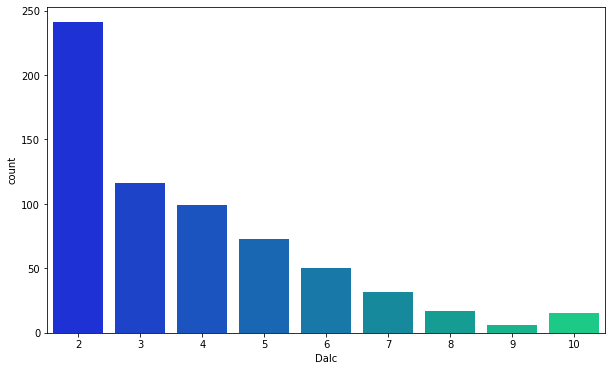

In [16]:
sns.countplot('Dalc',data=data,palette='winter')

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers

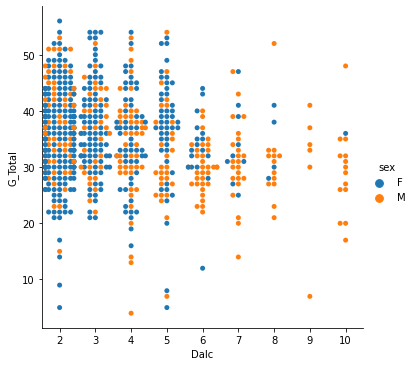

In [17]:
sns.catplot(y="G_Total", x='Dalc', hue='sex', kind = 'swarm', data=data)

In [18]:
avg = data['G_Total'].mean()

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Dalc', ylabel='G_Total'>

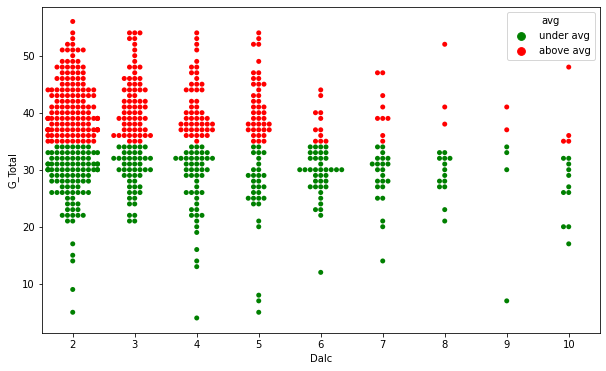

In [19]:
data['avg'] = ['under avg' if i < avg else 'above avg' for i in data.G_Total]
sns.swarmplot(x='Dalc',y='G_Total', hue='avg', data=data,palette={'above avg':'Red','under avg':'green'})

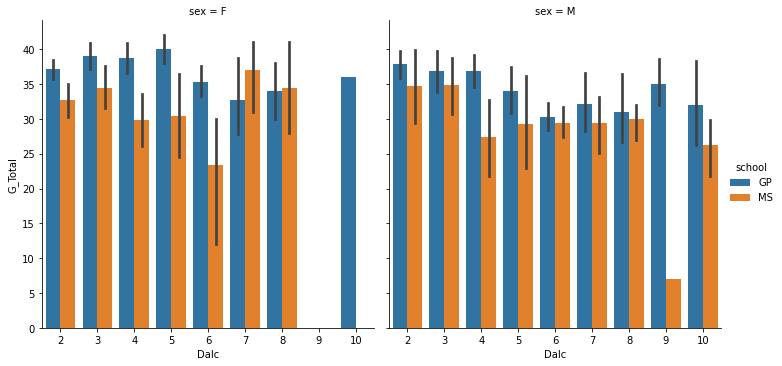

In [20]:
sns.catplot(x='Dalc',y='G_Total',hue='school',col='sex',data=data,kind='bar')

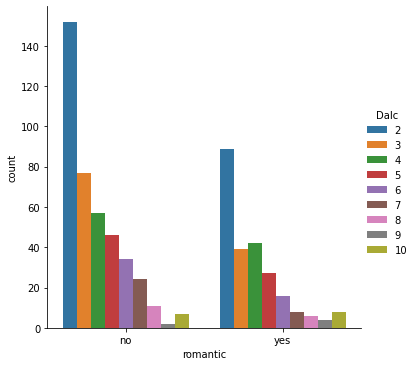

In [21]:
sns.catplot(x='romantic',hue='Dalc',data=data, kind='count')

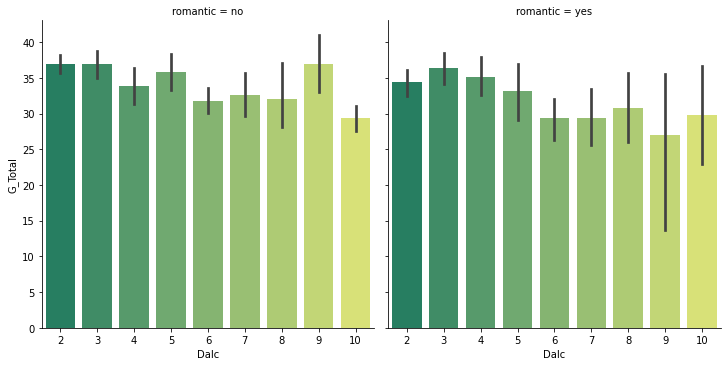

In [22]:
sns.catplot(x='Dalc',y='G_Total',col='romantic',data=data,kind='bar',palette='summer')

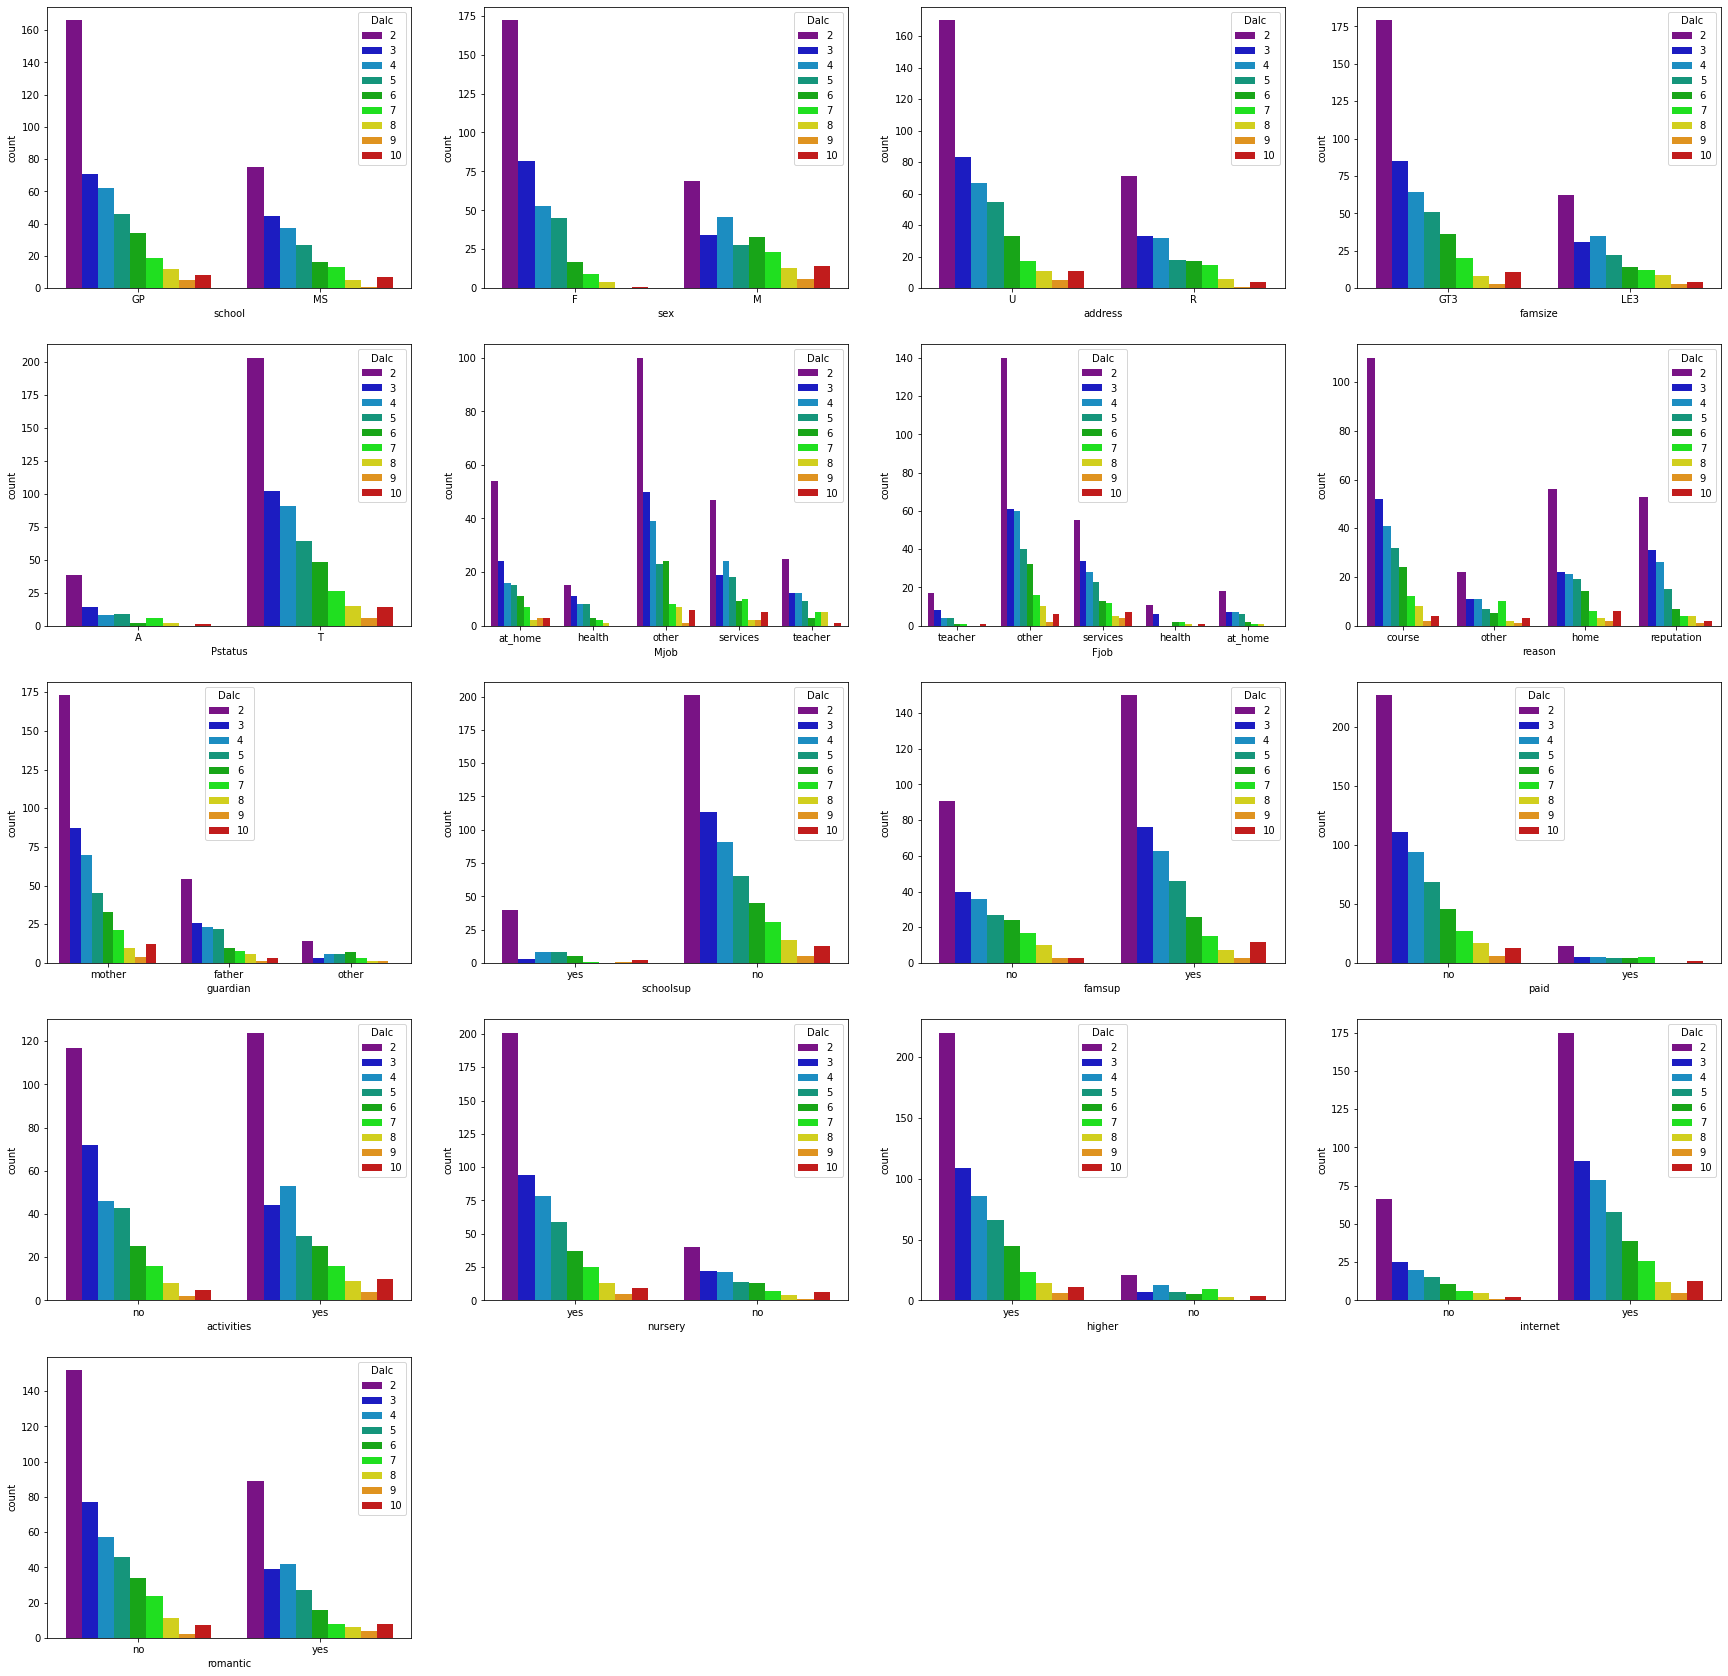

In [23]:
plt.figure(figsize=(30,30))
for i in enumerate(cat_col):
    plt.subplot(5,4,i[0]+1)
    sns.countplot(x=i[1],hue='Dalc',data=data,palette='nipy_spectral')

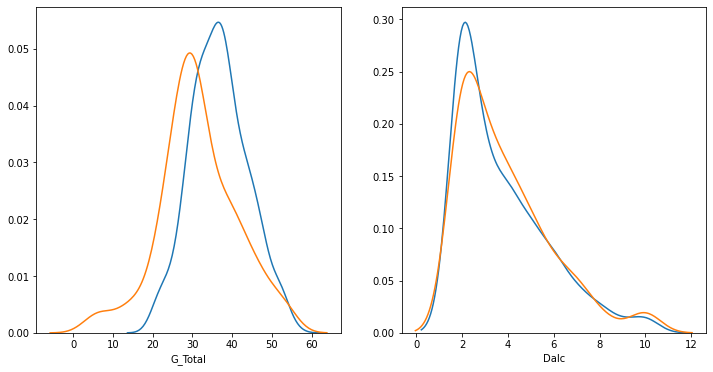

In [24]:
GP = data[data.school == 'GP']
MS = data[data.school == 'MS']

fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.kdeplot(GP.G_Total,label='GP',ax=ax[0])
sns.kdeplot(MS.G_Total,label='MS',ax=ax[0])

sns.kdeplot(GP.Dalc,label='GP',ax=ax[1])
sns.kdeplot(MS.Dalc,label='MS',ax=ax[1])
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

<AxesSubplot:xlabel='Pstatus', ylabel='count'>

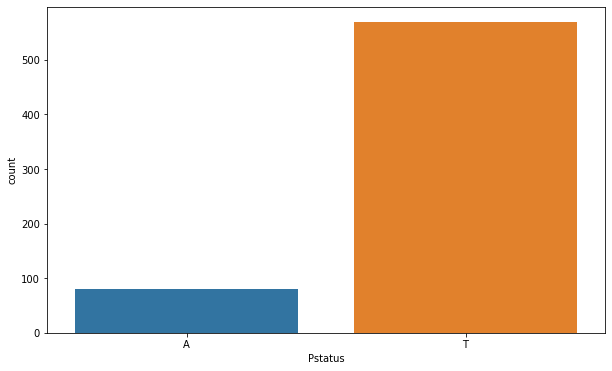

In [25]:
sns.countplot(x='Pstatus',data=data)

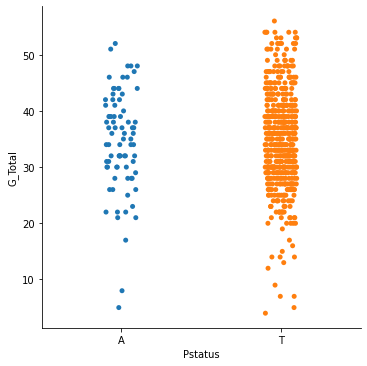

In [26]:
sns.catplot(x='Pstatus',y='G_Total',data=data)

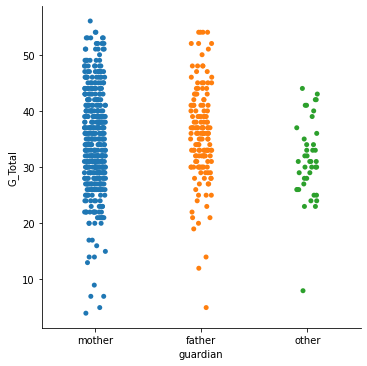

In [27]:
sns.catplot(x='guardian',y='G_Total',data=data)

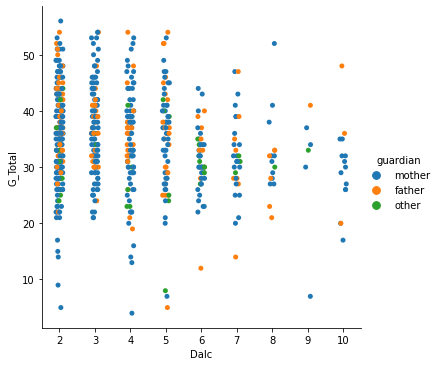

In [28]:
sns.catplot(x='Dalc',y='G_Total',hue='guardian',data=data)

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


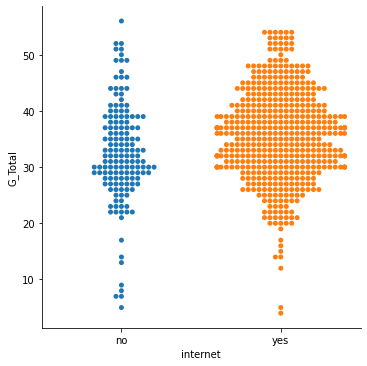

In [29]:
sns.catplot(x='internet',y='G_Total',data=data,kind='swarm')

<AxesSubplot:xlabel='internet', ylabel='G_Total'>

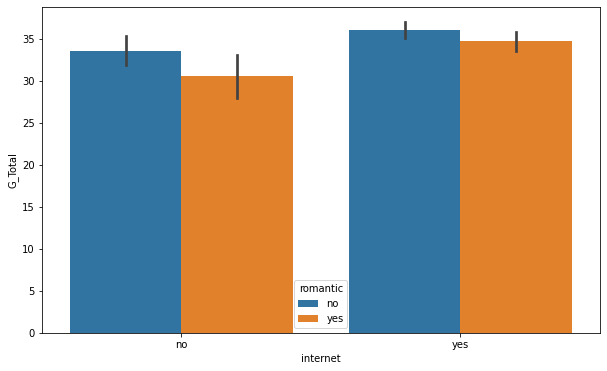

In [30]:
sns.barplot(x='internet',y='G_Total',data=data,hue='romantic')

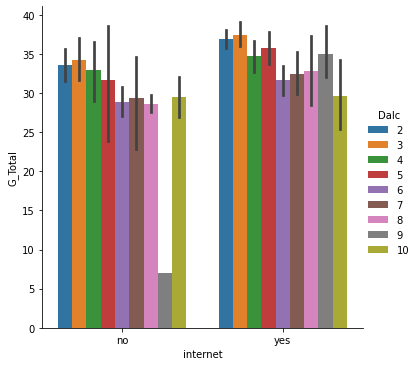

In [31]:
sns.catplot(x='internet',y='G_Total',data=data,hue='Dalc',kind='bar')

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

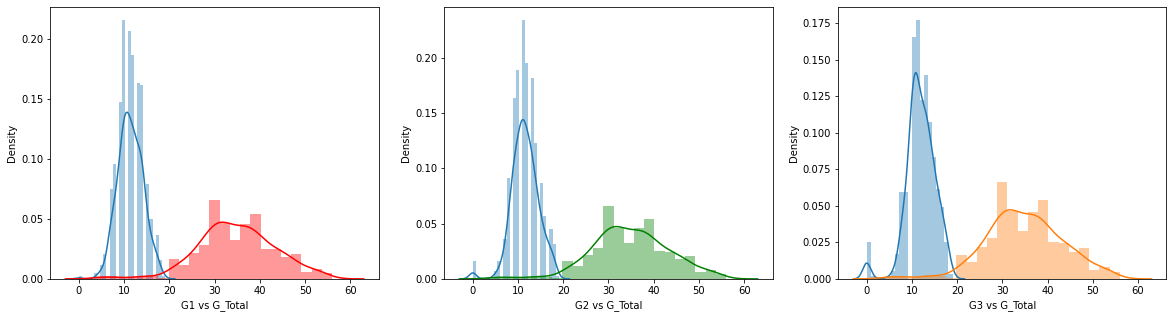

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G_Total', ylabel='Density'>

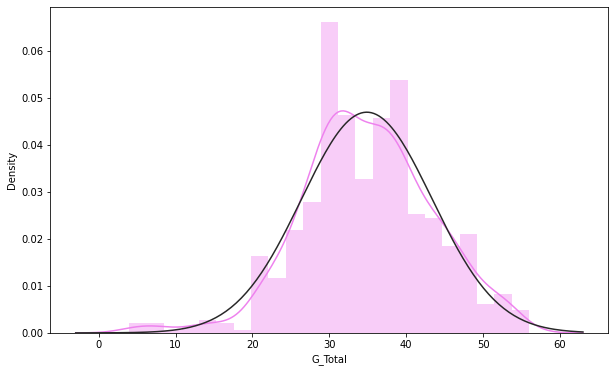

In [32]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.distplot(data['G1'],ax=ax[0])
sns.distplot(data['G_Total'],ax=ax[0],color='red')
ax[0].set_xlabel("G1 vs G_Total")

sns.distplot(data['G2'],ax=ax[1])
sns.distplot(data['G_Total'],ax=ax[1],color='green')
ax[1].set_xlabel("G2 vs G_Total")

sns.distplot(data['G3'],ax=ax[2])
sns.distplot(data['G_Total'],ax=ax[2])
ax[2].set_xlabel("G3 vs G_Total")
plt.show()

sns.distplot(data['G_Total'],color='violet',fit=norm)

<AxesSubplot:>

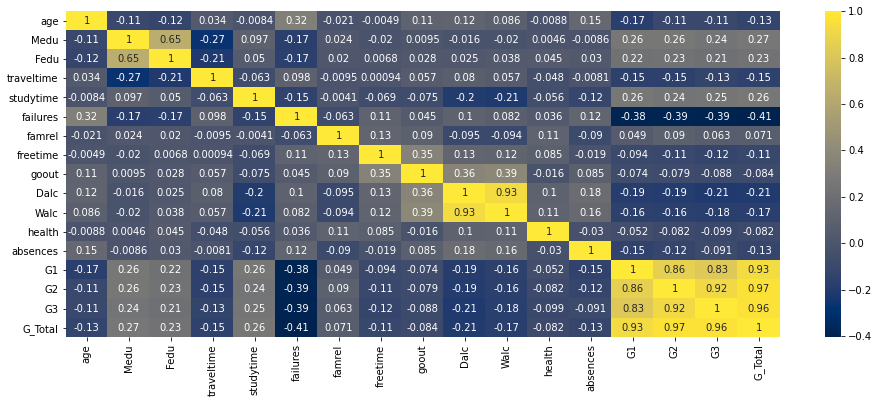

In [33]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True,cmap='cividis')

In [34]:
def printcol(data):
    for col in data.columns:
        print(f'{col}: {data[col].unique()}') 

In [35]:
yes_no_columns = ['schoolsup','famsup','paid','nursery','activities','higher','internet','romantic']

for col in yes_no_columns:
    data[col].replace({'yes':1,'no':0},inplace=True)

In [36]:
printcol(data)

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 1 2]
schoolsup: [1 0]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [1 0]
higher: [1 0]
internet: [0 1]
romantic: [0 1]
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [ 2  5  3  4  6 10  7  8  9]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1: [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2: [11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
G3: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
G_Total: [22 31 37 42 38 36 48 35 43 51 40 41 23 39 30 33 32 45 44 29

In [37]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
G_Total        int64
avg           object
dtype: object

In [38]:
data['school']=np.where(data['school'].values=='GP',1,0)
data['sex']=np.where(data['sex'].values=='M',1,0)
data['address']=np.where(data['address'].values=='U',1,0)
data['famsize']=np.where(data['famsize'].values=='GT3',1,0)
data['Pstatus']=np.where(data['Pstatus'].values=='A',1,0)

In [39]:
data.dtypes

school         int32
sex            int32
age            int64
address        int32
famsize        int32
Pstatus        int32
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
G_Total        int64
avg           object
dtype: object

In [40]:
printcol(data)

school: [1 0]
sex: [0 1]
age: [18 17 15 16 19 22 20 21]
address: [1 0]
famsize: [1 0]
Pstatus: [1 0]
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 1 2]
schoolsup: [1 0]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [1 0]
higher: [1 0]
internet: [0 1]
romantic: [0 1]
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [ 2  5  3  4  6 10  7  8  9]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1: [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2: [11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
G3: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
G_Total: [22 31 37 42 38 36 48 35 43 51 40 41 23 39 30 33 32 45 44 29 46 28 47 49
 34 26 53 27 

In [41]:
data.health

0      3
1      3
2      3
3      5
4      5
      ..
644    5
645    1
646    5
647    2
648    5
Name: health, Length: 649, dtype: int64

In [42]:
Mjob = pd.get_dummies(data['Mjob'],prefix='M_Job',drop_first=True)
Fjob = pd.get_dummies(data['Fjob'],prefix='F_Job',drop_first=True)
reason = pd.get_dummies(data['reason'],prefix='reason',drop_first=True)
guardian = pd.get_dummies(data['guardian'],prefix='guardian',drop_first=True)

In [43]:
Mjob.head()

,M_Job_health,M_Job_other,M_Job_services,M_Job_teacher
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,1,0,0


In [44]:
data.drop(['Mjob','Fjob','reason','guardian','G1','G2','G3','avg'],axis=1,inplace=True)

In [45]:
df_1 = pd.concat([data,Mjob,Fjob,reason,guardian],axis=1)
df_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,M_Job_teacher,F_Job_health,F_Job_other,F_Job_services,F_Job_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,18,1,1,1,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,1,0,17,1,1,0,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,1,0,15,1,0,0,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,1,0,15,1,1,0,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,1,0,16,1,1,0,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


In [46]:
X = df_1.drop('G_Total',axis=1)
Y = df_1.G_Total

In [47]:
print(X.shape)
print(Y.shape)

(649, 39)
(649,)


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(454, 39)
(195, 39)
(454,)
(195,)


In [49]:
models=[]
names=['Decision Tree','SVC','Random Forest','Adaboost']
cv_models=[]
# Decision Tree
dt=[]
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
models.append(accuracy_score(y_test,dt_pred))


cv_models.append(cross_val_score(dt,X,Y,cv=5).mean())

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [50]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
models.append(accuracy_score(y_test,svc_pred).mean())
cv_models.append(cross_val_score(svc,X,Y,cv=5).mean())

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [51]:
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
models.append(accuracy_score(y_test,rf_pred))
cv_models.append(cross_val_score(rf,X,Y,cv=5).mean())

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [52]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)
models.append(accuracy_score(y_test,ab_pred))
cv_models.append(cross_val_score(ab,X,Y,cv=5).mean())
print(cross_val_score(ab,X,Y,cv=5).mean())

c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\nipun madhusanka\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.0677757901013715


In [53]:
print(models)
print(cv_models)

[0.041025641025641026, 0.06666666666666667, 0.07692307692307693, 0.06666666666666667]
[0.04618962432915922, 0.058568872987477635, 0.06621347644603459, 0.0677757901013715]


In [54]:
cv_models = [i*1000 for i in cv_models]
models = [i*1000 for i in models]

In [55]:
final_df = pd.DataFrame({'Model_names':names,'Train_test_split_score in %':models,'CV_Score in %':cv_models})
final_df

,Model_names,Train_test_split_score in %,CV_Score in %
0,Decision Tree,41.025641,46.189624
1,SVC,66.666667,58.568873
2,Random Forest,76.923077,66.213476
3,Adaboost,66.666667,67.775790
